In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [3]:
filepath = '/Users/jeongseung-a/Desktop/데분프 플젝/전라도'
filelist = os.listdir(filepath)
filelist

['.DS_Store',
 '전라북도_지역별 방문자 수2.csv',
 '전라남도_지역별 방문자 수.csv',
 '전라북도_관광지 검색순위.xlsx',
 '전라남도_관광지 검색순위.xlsx',
 '전라남도_지역별 방문자 수2.csv',
 '전라북도_지역별 방문자 수.csv']

# 전라북도

In [5]:
fn_1 = '전라북도_관광지 검색순위.xlsx'
df_1 = pd.read_excel(filepath + '/' + fn_1)
df_1.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,전주한옥마을,전라북도,전주시 완산구,전북 전주시 완산구 기린대로 99-0,역사관광,역사유적지,349953
1,2,익산역,전라북도,익산시,전북 익산시 익산대로 153-0,기타관광,교통시설,209214
2,3,롯데몰군산점,전라북도,군산시,전북 군산시 조촌로 130-0,쇼핑,쇼핑몰,155882
3,4,전주월드컵경기장,전라북도,전주시 덕진구,전북 전주시 덕진구 기린대로 1055-0,문화관광,레저스포츠시설,155872
4,5,선유도해수욕장,전라북도,군산시,전북 군산시 선유도1길 235-0,자연관광,자연경관(하천/해양),102759


# 전라남도

In [6]:
fn_2 = '전라남도_관광지 검색순위.xlsx'
df_2 = pd.read_excel(filepath + '/' + fn_2)
df_2.head()

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,이순신광장,전라남도,여수시,전남 여수시,문화관광,도시공원,196486
1,2,죽녹원,전라남도,담양군,전남 담양군 죽녹원로 119-0,자연관광,자연공원,152012
2,3,화엄사,전라남도,구례군,전남 구례군 화엄사로 539-0,역사관광,종교성지,147104
3,4,순천만국가정원,전라남도,순천시,전남 순천시 국가정원1호길 47-0,기타관광,기타관광,131123
4,5,오동도,전라남도,여수시,전남 여수시 오동도로 222-0,자연관광,자연경관(하천/해양),125177


In [7]:
jld = pd.concat([df_1,df_2])
jld

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,전주한옥마을,전라북도,전주시 완산구,전북 전주시 완산구 기린대로 99-0,역사관광,역사유적지,349953
1,2,익산역,전라북도,익산시,전북 익산시 익산대로 153-0,기타관광,교통시설,209214
2,3,롯데몰군산점,전라북도,군산시,전북 군산시 조촌로 130-0,쇼핑,쇼핑몰,155882
3,4,전주월드컵경기장,전라북도,전주시 덕진구,전북 전주시 덕진구 기린대로 1055-0,문화관광,레저스포츠시설,155872
4,5,선유도해수욕장,전라북도,군산시,전북 군산시 선유도1길 235-0,자연관광,자연경관(하천/해양),102759
...,...,...,...,...,...,...,...,...
495,495,백아산눈썰매장,전라남도,화순군,전남 화순군 백아로 0-0,레저스포츠,육상레저스포츠,2976
496,497,장흥시외버스터미널,전라남도,장흥군,전남 장흥군 중앙로1길 8-0,기타관광,교통시설,2962
497,498,다산박물관,전라남도,강진군,전남 강진군 다산로 766-20,문화관광,전시시설,2942
498,499,제품부두,전라남도,광양시,전남 광양시 제철로 1655-426,기타관광,교통시설,2941


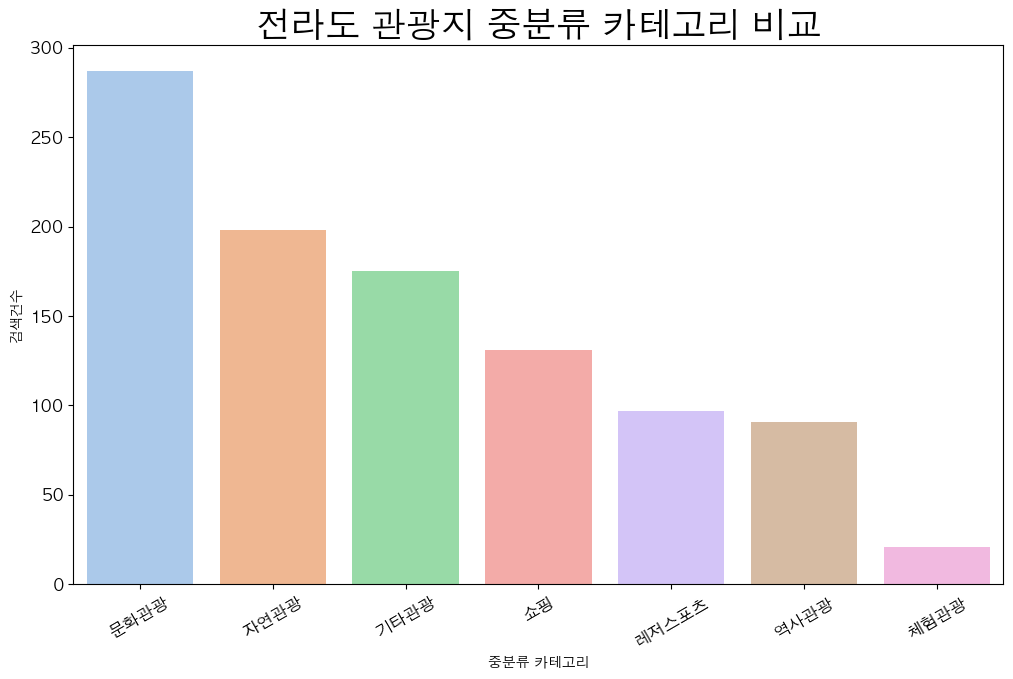

In [8]:
jl= jld.groupby(['중분류 카테고리'])[['검색건수']].count()
jl.reset_index(drop=False, inplace=True)
jl.sort_values(by='검색건수', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = jl,
           x=jl['중분류 카테고리'],
           y=jl['검색건수']);
plt.title('전라도 관광지 중분류 카테고리 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [9]:
fn_3_1 = '전라북도_지역별 방문자 수.csv'
fn_3_2 = '전라북도_지역별 방문자 수2.csv'
visit1_1 = pd.read_csv(filepath + '/' + fn_3_1,encoding='cp949')
visit1_2 = pd.read_csv(filepath + '/' + fn_3_2,encoding='cp949')

In [10]:
merge1 = pd.merge(visit1_1, visit1_2, on=['기초지자체명'])
merge1['기초지자체 방문자 수'] = merge1['기초지자체 방문자 수_x'] + merge1['기초지자체 방문자 수_y']
merge1 = merge1[[ '기초지자체명', '기초지자체 방문자 수']]

# 전라북도의 기초지자체 방문자 수 합 구하기
total1 = merge1['기초지자체 방문자 수'].sum()

# 새로운 행 생성
new_row = pd.DataFrame({ '기초지자체명': ':', '기초지자체 방문자 수': total1}, index=[len(merge1)])

# 총 방문자수를 포함한 데이터프레임
visitors1 = pd.concat([merge1, new_row], axis=0, ignore_index=True)
visitors1

,기초지자체명,기초지자체 방문자 수
0,고창군,16763068.0
1,군산시,39321478.0
2,김제시,18815967.0
3,남원시,17039086.0
4,무주군,13429653.0
5,부안군,18558588.0
6,순창군,8477784.0
7,완주군,32711368.0
8,익산시,34400076.0
9,임실군,12055246.0


In [11]:
visitors1['광역지자체명'] = '전라북도'

In [12]:
visitors1

,기초지자체명,기초지자체 방문자 수,광역지자체명
0,고창군,16763068.0,전라북도
1,군산시,39321478.0,전라북도
2,김제시,18815967.0,전라북도
3,남원시,17039086.0,전라북도
4,무주군,13429653.0,전라북도
5,부안군,18558588.0,전라북도
6,순창군,8477784.0,전라북도
7,완주군,32711368.0,전라북도
8,익산시,34400076.0,전라북도
9,임실군,12055246.0,전라북도


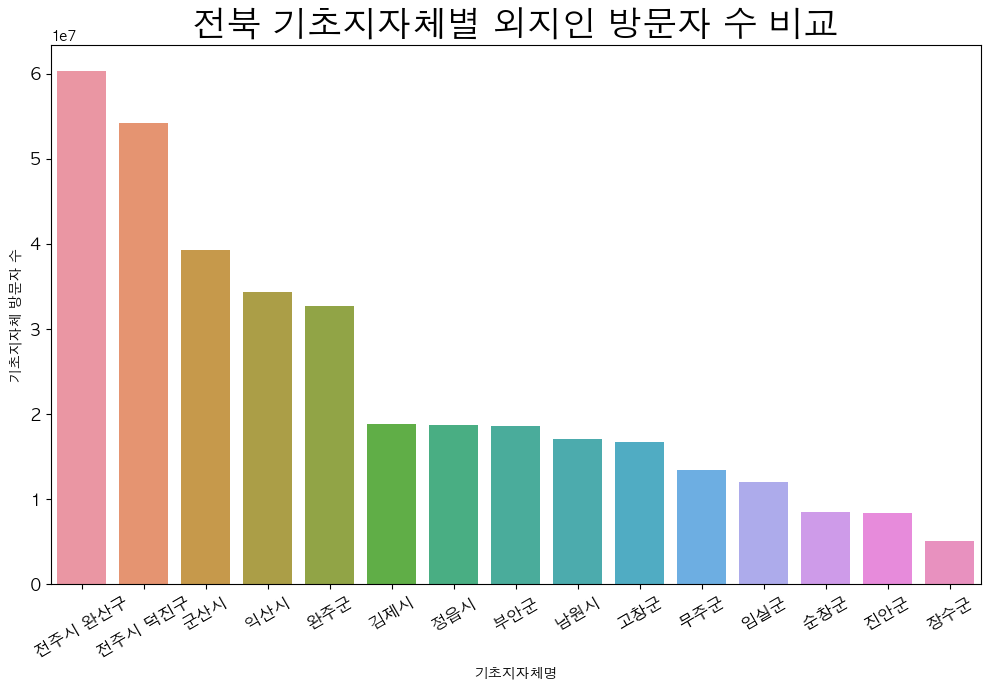

In [13]:
merge1.sort_values(by='기초지자체 방문자 수', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = merge1,
           x=merge1['기초지자체명'],
           y=merge1['기초지자체 방문자 수']);
plt.title('전북 기초지자체별 외지인 방문자 수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [14]:
fn_4_1 = '전라남도_지역별 방문자 수.csv'
fn_4_2 = '전라남도_지역별 방문자 수2.csv'
visit2_1 = pd.read_csv(filepath + '/' + fn_4_1,encoding='cp949')
visit2_2 = pd.read_csv(filepath + '/' + fn_4_2,encoding='cp949')

In [15]:
merge2 = pd.merge(visit2_1, visit2_2, on=['기초지자체명'])
merge2['기초지자체 방문자 수'] = merge2['기초지자체 방문자 수_x'] + merge2['기초지자체 방문자 수_y']
merge2 = merge2[[ '기초지자체명', '기초지자체 방문자 수']]

# 전라남도의 기초지자체 방문자 수 합 구하기
total2= merge2['기초지자체 방문자 수'].sum()

# 새로운 행 생성
new_row = pd.DataFrame({ '기초지자체명': ':', '기초지자체 방문자 수': total2}, index=[len(merge2)])

# 총 방문자수를 포함한 데이터프레임
visitors2 = pd.concat([merge2, new_row], axis=0, ignore_index=True)
visitors2

,기초지자체명,기초지자체 방문자 수
0,강진군,9428174.0
1,고흥군,13109886.0
2,곡성군,9794611.0
3,광양시,22507171.0
4,구례군,10340958.0
5,나주시,26428444.0
6,담양군,25503068.0
7,목포시,39059992.0
8,무안군,23014222.0
9,보성군,12123641.0


In [18]:
visitors2['광역지자체명']='전라남도'
visitors2

,기초지자체명,기초지자체 방문자 수,광역지자체명
0,강진군,9428174.0,전라남도
1,고흥군,13109886.0,전라남도
2,곡성군,9794611.0,전라남도
3,광양시,22507171.0,전라남도
4,구례군,10340958.0,전라남도
5,나주시,26428444.0,전라남도
6,담양군,25503068.0,전라남도
7,목포시,39059992.0,전라남도
8,무안군,23014222.0,전라남도
9,보성군,12123641.0,전라남도


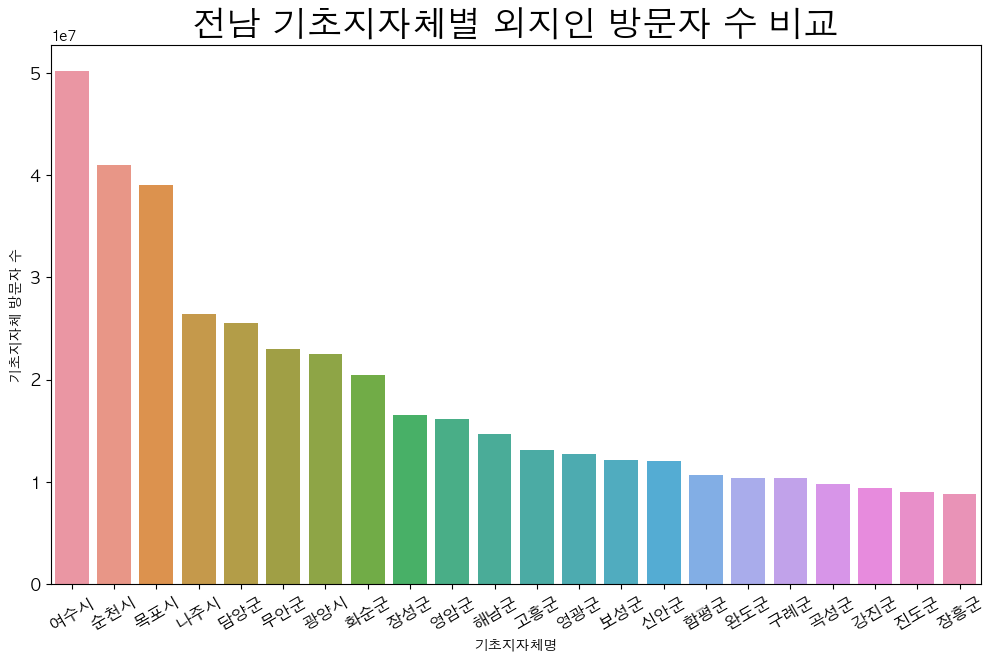

In [17]:
merge2.sort_values(by='기초지자체 방문자 수', ascending=False, inplace=True)
rcParams['figure.figsize'] = 12,7
sns.barplot(data = merge2,
           x=merge2['기초지자체명'],
           y=merge2['기초지자체 방문자 수']);
plt.title('전남 기초지자체별 외지인 방문자 수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [25]:
jld_total_visitors = pd.concat([visitors1,visitors2], axis=0, ignore_index=True)

# 기초지자체 방문자 수 합 구하기
total= jld_total_visitors['기초지자체 방문자 수'].sum()

# 새로운 행 생성
new_sum = pd.DataFrame({'광역지자체명': '합계', '기초지자체명': ':', '기초지자체 방문자 수': total}, index=[len(jld_total_visitors)])

# 전라도 총 방문자수를 포함한 데이터프레임
jld_total_visitors = pd.concat([jld_total_visitors, new_sum], axis=0, ignore_index=True)

jld_total_visitors

,기초지자체명,기초지자체 방문자 수,광역지자체명
0,고창군,1.676307e+07,전라북도
1,군산시,3.932148e+07,전라북도
2,김제시,1.881597e+07,전라북도
3,남원시,1.703909e+07,전라북도
4,무주군,1.342965e+07,전라북도
5,부안군,1.855859e+07,전라북도
6,순창군,8.477784e+06,전라북도
7,완주군,3.271137e+07,전라북도
8,익산시,3.440008e+07,전라북도
9,임실군,1.205525e+07,전라북도
